<a href="https://colab.research.google.com/github/sharan11/Intro-to-Deep-Learning-with-Pytorch-Exercise-Solutions/blob/master/Loading_Image_Data_and_Transfer_learning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms


**Exercise**: Load images from the Cat_Dog_data/train folder, define a few transforms, then build the dataloader.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Solution
data_dir = '/content/drive/My Drive/datasets/Cat_Dog_data/train'

# TODO: compose transforms here
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])
# TODO: create the ImageFolder
dataset = datasets.ImageFolder(data_dir, transform=transform)
# TODO: use the ImageFolder dataset to create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [3]:
#!ls "/content/drive/My Drive/datasets/Cat_Dog_data"

test  train


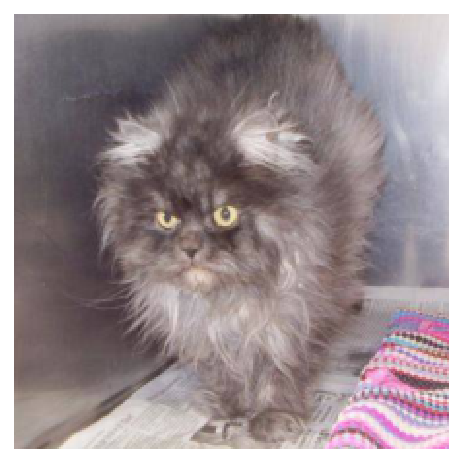

In [6]:
# Run this to test your data loader
import helper_pt
images, labels = next(iter(dataloader))
helper_pt.imshow(images[0], normalize=False)

**Exercise**: Define transforms for training data and testing data below. Leave off normalization for now.

In [0]:
data_dir = '/content/drive/My Drive/datasets/Cat_Dog_data/'

# TODO: Define transforms for the training data and testing data
# Solution
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

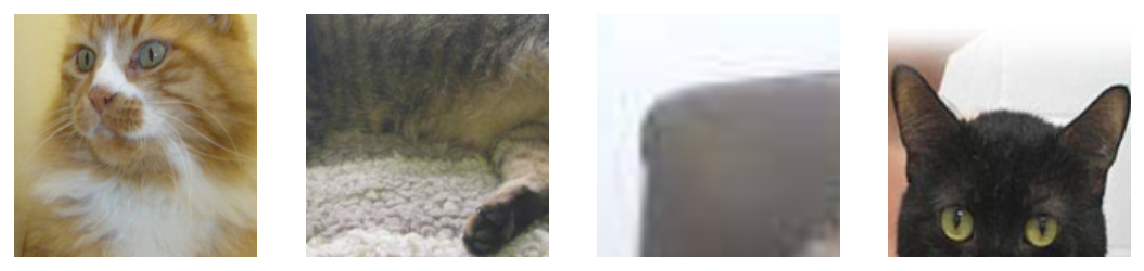

In [8]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper_pt.imshow(images[ii], ax=ax, normalize=False)

In [0]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset
# Solution below (I have build the model using transfer learning method)

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [0]:
data_dir = '/content/drive/My Drive/datasets/Cat_Dog_data/'

# TODO: Define transforms for the training data and testing data
# Solution
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [11]:
model = models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 28.3MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
# changing inbuilt classifier from Desnet to my own classifier
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

Training in GPU  (Speed comparison)

In [0]:
import time

In [14]:
for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(trainloader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

Device = cpu; Time per batch: 4.898 seconds
Device = cuda; Time per batch: 0.016 seconds


**Exercise**: Train a pretrained models to classify the cat and dog images. Continue with the DenseNet model, or try ResNet, it's also a good model to try out first. Make sure you are only training the classifier and the parameters for the features part are frozen.

In [15]:
## TODO: Use a pretrained model to classify the cat and dog images
# Solution
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

models = models.densenet121(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [19]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5

for epoch in range(epochs):
  for inputs, labels in trainloader:
    steps += 1
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    logps = model.forward(inputs)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:
      test_loss = 0
      accuracy = 0
      model.eval()
      with torch.no_grad():
        for inputs, labels in testloader:
          inputs, labels = inputs.to(device), labels.to(device)
          logps = model.forward(inputs)
          batch_loss = criterion(logps, labels)

          test_loss += batch_loss.item()

          #calculating accuracy
          ps = torch.exp(logps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

      print(f"Epoch {epoch+1}/{epochs}.."
            f"Train loss: {running_loss/print_every:.3f}.."
            f"Test loss: {test_loss/len(testloader):.3f}.."
            f"Test Accuracy {accuracy/len(testloader):.3f}")
      running_loss = 0
      model.train()

Epoch 1/1..Train loss: 0.132..Test loss: 0.579..Test Accuracy 0.793
Epoch 1/1..Train loss: 0.090..Test loss: 0.512..Test Accuracy 0.847
Epoch 1/1..Train loss: 0.100..Test loss: 0.520..Test Accuracy 0.823
Epoch 1/1..Train loss: 0.103..Test loss: 0.499..Test Accuracy 0.838
Epoch 1/1..Train loss: 0.133..Test loss: 0.442..Test Accuracy 0.878
Epoch 1/1..Train loss: 0.085..Test loss: 0.659..Test Accuracy 0.732


KeyboardInterrupt: ignored

In [20]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/1.. Train loss: 0.157.. Test loss: 0.443.. Test accuracy: 0.868
Epoch 1/1.. Train loss: 0.094.. Test loss: 0.437.. Test accuracy: 0.882
Epoch 1/1.. Train loss: 0.111.. Test loss: 0.546.. Test accuracy: 0.820
Epoch 1/1.. Train loss: 0.112.. Test loss: 0.434.. Test accuracy: 0.879
Epoch 1/1.. Train loss: 0.113.. Test loss: 0.456.. Test accuracy: 0.845
Epoch 1/1.. Train loss: 0.089.. Test loss: 0.589.. Test accuracy: 0.777
Epoch 1/1.. Train loss: 0.102.. Test loss: 0.597.. Test accuracy: 0.823
Epoch 1/1.. Train loss: 0.110.. Test loss: 0.420.. Test accuracy: 0.889
Epoch 1/1.. Train loss: 0.121.. Test loss: 0.471.. Test accuracy: 0.837
Epoch 1/1.. Train loss: 0.089.. Test loss: 0.697.. Test accuracy: 0.718
Epoch 1/1.. Train loss: 0.141.. Test loss: 0.442.. Test accuracy: 0.878
Epoch 1/1.. Train loss: 0.108.. Test loss: 0.427.. Test accuracy: 0.879
Epoch 1/1.. Train loss: 0.112.. Test loss: 0.640.. Test accuracy: 0.736
Epoch 1/1.. Train loss: 0.117.. Test loss: 0.435.. Test accuracy